# 스팀 게임 태그 분석

2022/01/22 일자로 추출한 스팀 게임 태그 분석 결과이다.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
tag_review_data = pd.read_csv('./top100_steam_game_info.csv', encoding = 'utf-8', index_col = 0)

In [3]:
tag_review_data

,Game,top_5_tags,review_level,review_count
0,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",Very Positive,6137078
1,Dota 2,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",Mostly Positive,1652880
2,PUBG: BATTLEGROUNDS,"['Survival', 'Shooter', 'Multiplayer', 'Battle...",Mixed,1892443
3,Apex Legends,"['Free to Play', 'Battle Royale', 'Multiplayer...",Very Positive,372061
4,Grand Theft Auto V,"['Open World', 'Action', 'Multiplayer', 'Autom...",Very Positive,1276139
...,...,...,...,...
95,Hollow Knight,"['Metroidvania', 'Souls-like', 'Platformer', '...",Overwhelmingly Positive,199446
96,Fall Guys: Ultimate Knockout,"['Multiplayer', 'Party Game', 'Battle Royale',...",Mostly Positive,417357
97,Conan Exiles,"['Survival', 'Open World', 'Building', 'Nudity...",Very Positive,75204
98,Melvor Idle,"['Idler', 'Casual', 'RPG', 'Indie', 'Adventure']",Very Positive,4691


추출한 데이터에는 100개의 게임과, 최대 5개의 태그, 리뷰의 정보와 리뷰 개수가 담겨 있다.

이와 별도로, 방문자 수와의 차이를 확인하기 위해 22/01/11에 추출한 방문자 수 데이터 또한 가져와본다.

In [4]:
player_data = pd.read_csv('./prepared_steam_player_time_data.csv', encoding = 'utf-8', index_col = 0)

In [5]:
player_data

,Game,Month,Avg_Players,Peak_Players,Year
0,Counter-Strike: Global Offensive,12,546614.19,950586,2021
1,Counter-Strike: Global Offensive,11,548161.67,935593,2021
2,Counter-Strike: Global Offensive,10,512435.85,864966,2021
3,Counter-Strike: Global Offensive,9,512350.92,942519,2021
4,Counter-Strike: Global Offensive,8,512081.96,802544,2021
...,...,...,...,...,...
5424,Hollow Knight,4,728.86,1305,2017
5425,Hollow Knight,3,1126.45,2027,2017
5426,Hollow Knight,2,192.30,2077,2017
5427,Hollow Knight,1,1.96,6,2017


여기서는 평균 방문자수의 평균에 대한 정보만 필요하다.

In [6]:
avg_player_df = pd.DataFrame(player_data['Avg_Players'].groupby(player_data['Game']).mean())

두 data를 merge해서 사용할 것이다. 이 때, innerjoin을 활용할 것이다.

In [7]:
df = pd.merge(avg_player_df, tag_review_data, left_on='Game', right_on='Game', how='inner')

In [8]:
df

,Game,Avg_Players,top_5_tags,review_level,review_count
0,7 Days to Die,10518.917526,"['Survival', 'Zombies', 'Voxel', 'Open World',...",Very Positive,201877
1,ARK: Survival Evolved,43003.742000,"['Open World Survival Craft', 'Survival', 'Ope...",Very Positive,494262
2,Age of Empires II: Definitive Edition,14780.262692,"['Strategy', 'RTS', 'City Builder', 'Multiplay...",Overwhelmingly Positive,93763
3,Age of Empires IV,21188.755000,"['Strategy', 'RTS', 'Multiplayer', 'Medieval',...",Very Positive,27593
4,Apex Legends,122220.805714,"['Free to Play', 'Battle Royale', 'Multiplayer...",Very Positive,372061
...,...,...,...,...,...
87,World of Warships,5839.660392,"['Naval Combat', 'Free to Play', 'Massively Mu...",Very Positive,94053
88,Yu-Gi-Oh! Duel Links,7754.211800,"['Free to Play', 'Card Game', 'Anime', 'Strate...",Very Positive,35365
89,tModLoader,11515.083000,"['Adventure', 'Action', 'Indie', 'RPG', 'Free ...",Overwhelmingly Positive,102640
90,雀魂麻将(MahjongSoul),4166.096111,"['Psychological Horror', 'Souls-like', 'Free t...",Mixed,21854


추출 일자가 차이가 있어서인지, 모든 게임의 데이터가 나오진 않은 듯하다. 2일동안 인기가 유지된 게임으로 판단할 수 있으므로, 92개의 게임에 대해서 분석해보는 것으로 한다.

## Data 추가 전처리

In [9]:
df.review_level.unique()

array(['Very Positive', 'Overwhelmingly Positive', 'Mostly Positive',
       'Mixed', 'cannot_find'], dtype=object)

cannot_find로 설정한, 즉 리뷰 정보가 부족해서 찾을 수 없는 줄을 제외하자.

In [10]:
df = df.loc[df.review_level != 'cannot_find'].reset_index(drop = True)

In [11]:
df

,Game,Avg_Players,top_5_tags,review_level,review_count
0,7 Days to Die,10518.917526,"['Survival', 'Zombies', 'Voxel', 'Open World',...",Very Positive,201877
1,ARK: Survival Evolved,43003.742000,"['Open World Survival Craft', 'Survival', 'Ope...",Very Positive,494262
2,Age of Empires II: Definitive Edition,14780.262692,"['Strategy', 'RTS', 'City Builder', 'Multiplay...",Overwhelmingly Positive,93763
3,Age of Empires IV,21188.755000,"['Strategy', 'RTS', 'Multiplayer', 'Medieval',...",Very Positive,27593
4,Apex Legends,122220.805714,"['Free to Play', 'Battle Royale', 'Multiplayer...",Very Positive,372061
...,...,...,...,...,...
84,World of Warships,5839.660392,"['Naval Combat', 'Free to Play', 'Massively Mu...",Very Positive,94053
85,Yu-Gi-Oh! Duel Links,7754.211800,"['Free to Play', 'Card Game', 'Anime', 'Strate...",Very Positive,35365
86,tModLoader,11515.083000,"['Adventure', 'Action', 'Indie', 'RPG', 'Free ...",Overwhelmingly Positive,102640
87,雀魂麻将(MahjongSoul),4166.096111,"['Psychological Horror', 'Souls-like', 'Free t...",Mixed,21854


또한 리뷰 등급이 구분이 잘 되지 않아 해당 내용에 대해 조사하여, 값들을 변형하고자 한다.

In [12]:
df

,Game,Avg_Players,top_5_tags,review_level,review_count
0,7 Days to Die,10518.917526,"['Survival', 'Zombies', 'Voxel', 'Open World',...",Very Positive,201877
1,ARK: Survival Evolved,43003.742000,"['Open World Survival Craft', 'Survival', 'Ope...",Very Positive,494262
2,Age of Empires II: Definitive Edition,14780.262692,"['Strategy', 'RTS', 'City Builder', 'Multiplay...",Overwhelmingly Positive,93763
3,Age of Empires IV,21188.755000,"['Strategy', 'RTS', 'Multiplayer', 'Medieval',...",Very Positive,27593
4,Apex Legends,122220.805714,"['Free to Play', 'Battle Royale', 'Multiplayer...",Very Positive,372061
...,...,...,...,...,...
84,World of Warships,5839.660392,"['Naval Combat', 'Free to Play', 'Massively Mu...",Very Positive,94053
85,Yu-Gi-Oh! Duel Links,7754.211800,"['Free to Play', 'Card Game', 'Anime', 'Strate...",Very Positive,35365
86,tModLoader,11515.083000,"['Adventure', 'Action', 'Indie', 'RPG', 'Free ...",Overwhelmingly Positive,102640
87,雀魂麻将(MahjongSoul),4166.096111,"['Psychological Horror', 'Souls-like', 'Free t...",Mixed,21854


In [13]:
df.review_count.min()

9446

남은 게임들의 리뷰 개수의 최소는 9000건 이상이다. 스팀은 리뷰 개수가 500개 이상일 경우 다음과 같이 평가한다.

구간별 평가 문구
- 95 - 100% : 압도적으로 긍정적 (Overwhelmingly Positive)   (5)
- 80 - 94% : 매우 긍정적 (Very Positive)   (4)
- 70 - 79% : 대체로 긍정적 (Mostly Positive)  (3)
- 40 - 69% : 복합적 (Mixed)   (2)
- 20 - 39% : 대체로 부정적 (Mostly Negative)    (1)
- 0 - 19% : 압도적으로 부정적 (Overwhelmingly Negative)  (0)

리뷰에 대해서 좀 바꿔주자.

In [14]:
review_dict = {'Overwhelmingly Positive': 5,
               'Very Positive': 4,
               'Mostly Positive': 3,
               'Mixed': 2,
               'Mostly Negative': 1,
               'Overwhelmingly Negative': 0}

df['review_level'] = df.review_level.apply(lambda x : review_dict[x])

In [15]:
df

,Game,Avg_Players,top_5_tags,review_level,review_count
0,7 Days to Die,10518.917526,"['Survival', 'Zombies', 'Voxel', 'Open World',...",4,201877
1,ARK: Survival Evolved,43003.742000,"['Open World Survival Craft', 'Survival', 'Ope...",4,494262
2,Age of Empires II: Definitive Edition,14780.262692,"['Strategy', 'RTS', 'City Builder', 'Multiplay...",5,93763
3,Age of Empires IV,21188.755000,"['Strategy', 'RTS', 'Multiplayer', 'Medieval',...",4,27593
4,Apex Legends,122220.805714,"['Free to Play', 'Battle Royale', 'Multiplayer...",4,372061
...,...,...,...,...,...
84,World of Warships,5839.660392,"['Naval Combat', 'Free to Play', 'Massively Mu...",4,94053
85,Yu-Gi-Oh! Duel Links,7754.211800,"['Free to Play', 'Card Game', 'Anime', 'Strate...",4,35365
86,tModLoader,11515.083000,"['Adventure', 'Action', 'Indie', 'RPG', 'Free ...",5,102640
87,雀魂麻将(MahjongSoul),4166.096111,"['Psychological Horror', 'Souls-like', 'Free t...",2,21854


다음과 같이 0~5 scale로 분석하기 편하게 바뀌었다. 

다음은 top-5 tags에 대한 분석이다.

In [16]:
df.dtypes

Game             object
Avg_Players     float64
top_5_tags       object
review_level      int64
review_count      int64
dtype: object

큰 문제가 발생했다. top_5_tags가 list 형태가 아닌 string 형태다.

검색해본 결과 ast라는 package를 활용하여 해결한다.

In [17]:
import ast
df['top_5_tags'] = df.top_5_tags.apply(lambda x : ast.literal_eval(x))
df['tag_len'] = df.top_5_tags.apply(lambda x : len(list(x)))

In [18]:
df.head(5)

,Game,Avg_Players,top_5_tags,review_level,review_count,tag_len
0,7 Days to Die,10518.917526,"[Survival, Zombies, Voxel, Open World, Open Wo...",4,201877,5
1,ARK: Survival Evolved,43003.742000,"[Open World Survival Craft, Survival, Open Wor...",4,494262,5
2,Age of Empires II: Definitive Edition,14780.262692,"[Strategy, RTS, City Builder, Multiplayer, Bas...",5,93763,5
3,Age of Empires IV,21188.755000,"[Strategy, RTS, Multiplayer, Medieval, Singlep...",4,27593,5
4,Apex Legends,122220.805714,"[Free to Play, Battle Royale, Multiplayer, Sho...",4,372061,5


In [19]:
df.top_5_tags[0][0]

'Survival'

다음과 같이, 의도한대로 태그 들이 리스트에 잘 담겨졌다.

In [20]:
df.describe()

,Avg_Players,review_level,review_count,tag_len
count,89.000000,89.000000,8.900000e+01,89.0
mean,36580.361773,4.033708,3.540356e+05,5.0
std,75305.404650,0.804101,7.042117e+05,0.0
min,1278.640102,2.000000,9.446000e+03,5.0
25%,9633.069882,4.000000,9.376300e+04,5.0
50%,15116.014625,4.000000,1.814580e+05,5.0
75%,30003.722500,5.000000,4.173570e+05,5.0
max,451027.296491,5.000000,6.137078e+06,5.0


들어가 있는 게임들은, 매우 깔끔하게 태그가 5개씩 들어가있다.

### 조사 1. 태그 조사

In [21]:
tag_dict = {}
# 키가 있나 없나에 따라서 가른다. 키가 있으면 값을 추가하고, 없으면 값을 1 더한다.
for i in range(len(df)):
    for j in range(5):
        cur_tag = df.top_5_tags[i][j]
        if cur_tag in tag_dict:
            tag_dict[cur_tag] += 1
        else:
            tag_dict[cur_tag] = 1

In [22]:
keyword_count = sorted(tag_dict.items(), key = lambda item : item[1], reverse = True)

Keyword를 조사한 결과, "Multiplayer", "OpenWorld", "Survival", "Free to Play", "RPG" 등등 순서로 키워드가 나옴을 알 수 있다.

한 게임에 같은 키워드가 절반 이상 들어갈 수 없다는 것을 가정하면, 해당 게임들의 인기가 상당하다는 것을 알 수 있다.

In [23]:
keyword_df = pd.DataFrame(keyword_count, columns = ['keyword', 'count'])
# keyword_df.to_csv('steam_game_tag_count.csv')

해당 파일은 저장하여, 구글 데이터 스튜디오에서 추가 시각화 자료로 사용하자.
여기서는 조금 더 통계적 분석을 진행하려고 한다.

In [24]:
keyword_df

,keyword,count
0,Multiplayer,46
1,Open World,26
2,Survival,17
3,Free to Play,16
4,RPG,16
...,...,...
123,Design & Illustration,1
124,Tanks,1
125,Naval Combat,1
126,Naval,1


실제로 그러면 게임의 종류에 따라 평가가 달라지는지를 확인해보자.

#### 태그에 따른 평가 정도의 통계검증
이를 위해서 예시로, Multiplayer에 대해서 확인해보자.
멀티 플레이어 게임과, 비멀티 플레이어 게임에 대해 유의미한 차이가 있나 보자.

In [25]:
df['is_multi'] = df.top_5_tags.apply(lambda x : 1 if 'Multiplayer' in x else 0)

In [26]:
df['review_level'].groupby(df['is_multi']).mean()

is_multi
0    4.116279
1    3.956522
Name: review_level, dtype: float64

평균 자체에는 큰 차이가 없어보인다. 시각화를 통해 차이를 분석하고자 한다.

In [27]:
df_sorted_user = df.sort_values('Avg_Players', ascending = False).reset_index(drop = True)

In [28]:
df_sorted_user

,Game,Avg_Players,top_5_tags,review_level,review_count,tag_len,is_multi
0,Dota 2,451027.296491,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",3,1652880,5,1
1,PUBG: BATTLEGROUNDS,428827.741207,"[Survival, Shooter, Multiplayer, Battle Royale...",2,1892443,5,1
2,Counter-Strike: Global Offensive,332546.364035,"[FPS, Shooter, Multiplayer, Competitive, Action]",4,6137078,5,1
3,New World,216171.893333,"[Massively Multiplayer, Open World, MMORPG, RP...",2,214390,5,0
4,Apex Legends,122220.805714,"[Free to Play, Battle Royale, Multiplayer, Sho...",4,372061,5,1
...,...,...,...,...,...,...,...
84,Soundpad,4093.217255,"[Utilities, Audio Production, Music, Software,...",5,34709,5,0
85,SCUM,3974.747170,"[Survival, Open World Survival Craft, Multipla...",4,65897,5,1
86,Hollow Knight,2922.208033,"[Metroidvania, Souls-like, Platformer, Great S...",5,199446,5,0
87,Dead Cells,1886.555932,"[Roguelite, Metroidvania, Pixel Graphics, Rogu...",5,95311,5,0


평균 플레이어 수 5만 이상을 기록한 게임의 키워드를 시각화하려고 한다.

In [29]:
df_sorted_user.loc[df_sorted_user.Avg_Players >= 50000]

,Game,Avg_Players,top_5_tags,review_level,review_count,tag_len,is_multi
0,Dota 2,451027.296491,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",3,1652880,5,1
1,PUBG: BATTLEGROUNDS,428827.741207,"[Survival, Shooter, Multiplayer, Battle Royale...",2,1892443,5,1
2,Counter-Strike: Global Offensive,332546.364035,"[FPS, Shooter, Multiplayer, Competitive, Action]",4,6137078,5,1
3,New World,216171.893333,"[Massively Multiplayer, Open World, MMORPG, RP...",2,214390,5,0
4,Apex Legends,122220.805714,"[Free to Play, Battle Royale, Multiplayer, Sho...",4,372061,5,1
5,Halo Infinite,77310.800000,"[FPS, Free to Play, Multiplayer, Action, First...",3,122890,5,1
6,Destiny 2,69392.448519,"[Free to Play, PvP, Open World, Looter Shooter...",4,436136,5,0
7,Grand Theft Auto V,67309.713333,"[Open World, Action, Multiplayer, Automobile S...",4,1276139,5,1
8,Valheim,58762.015455,"[Open World Survival Craft, Survival, Online C...",4,321682,5,1
9,NARAKA: BLADEPOINT,56257.468000,"[Battle Royale, Multiplayer, Martial Arts, Sex...",3,85160,5,1


플레이어 수가 많다고 해서 Review level이 꼭 높지는 않은 듯 하다. (예시- 배틀그라운드)
아무튼, word cloud를 그리면 다음과 같다.

In [30]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [31]:
wordset = list(df_sorted_user.loc[df_sorted_user.Avg_Players >= 50000].top_5_tags.values)
text_set = []
for i in range(len(wordset)):
    for j in range(5):
        text_set.append(wordset[i][j])
count = Counter(text_set)
text = dict(count.most_common())
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Arial.ttf', background_color='black').generate_from_frequencies(text)

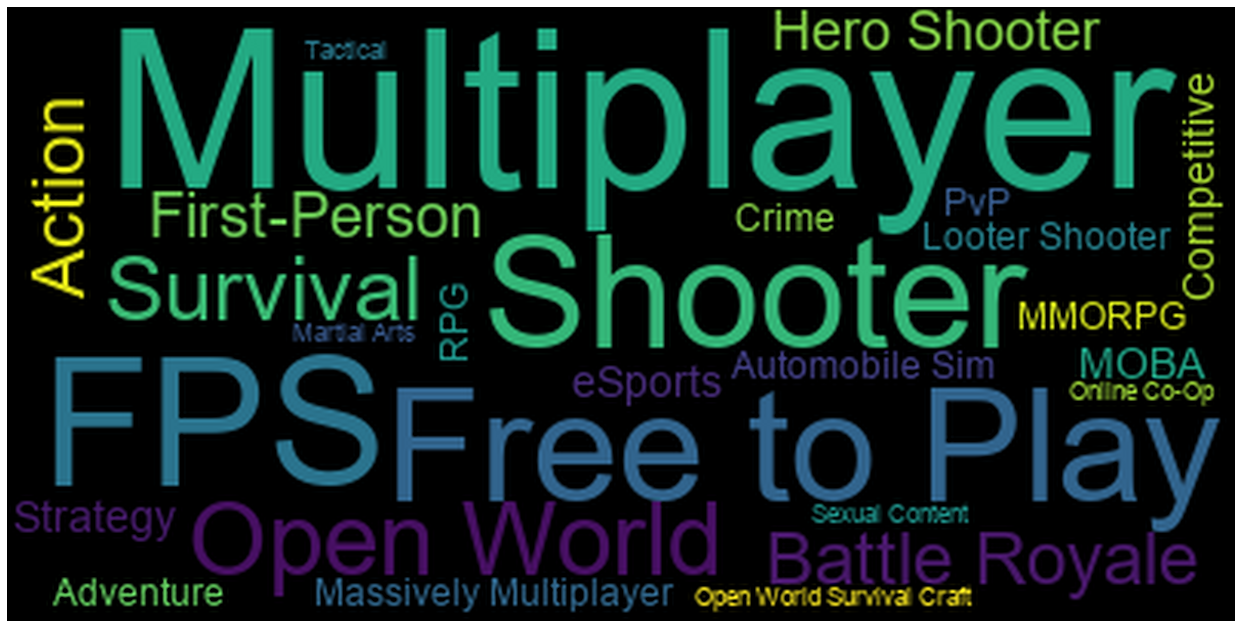

In [32]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

Multiplayer, FPS, Free to Play게임이 가장 큰 공통점임을 알 수 있다.

### 조사 2. 좋은 리뷰를 가진 게임에 대한 분석

이번에는 리뷰 레벨이 5인 게임들에 대해서 분석한다.

<ipython-input-33-0151206fecea>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.review_5 = list(df_sorted_user.loc[df_sorted_user.review_level == 5].top_5_tags.values)


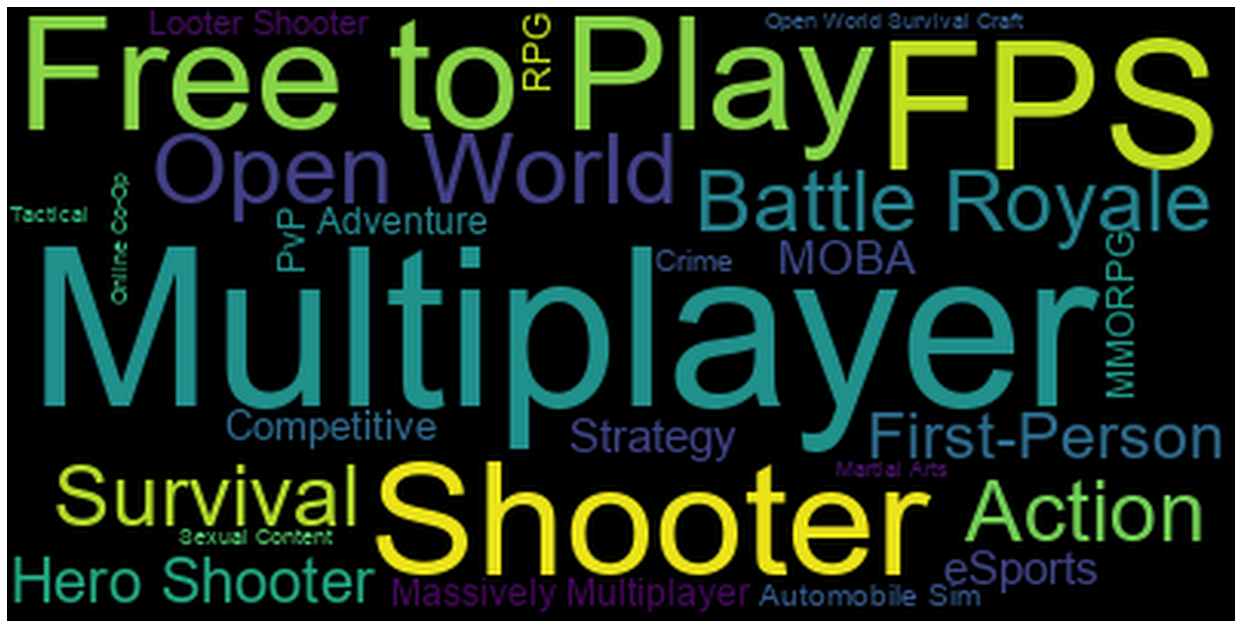

In [33]:
df.review_5 = list(df_sorted_user.loc[df_sorted_user.review_level == 5].top_5_tags.values)
text_set = []
for i in range(len(wordset)):
    for j in range(5):
        text_set.append(wordset[i][j])
count = Counter(text_set)
text = dict(count.most_common())
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Arial.ttf', background_color='black').generate_from_frequencies(text)

plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

좋은 평가를 받는 게임에서도 주요 키워드는 비슷하게 멀티 플레이어 / FPS / 오픈월드 등의 특징을 가지고 있다.

### 조사 3. 리뷰가 많은 게임에 대해서

<ipython-input-34-749d7eec9e04>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.review_cnts = list(df_sorted_user.loc[df_sorted_user.review_count >= 500000].top_5_tags.values)


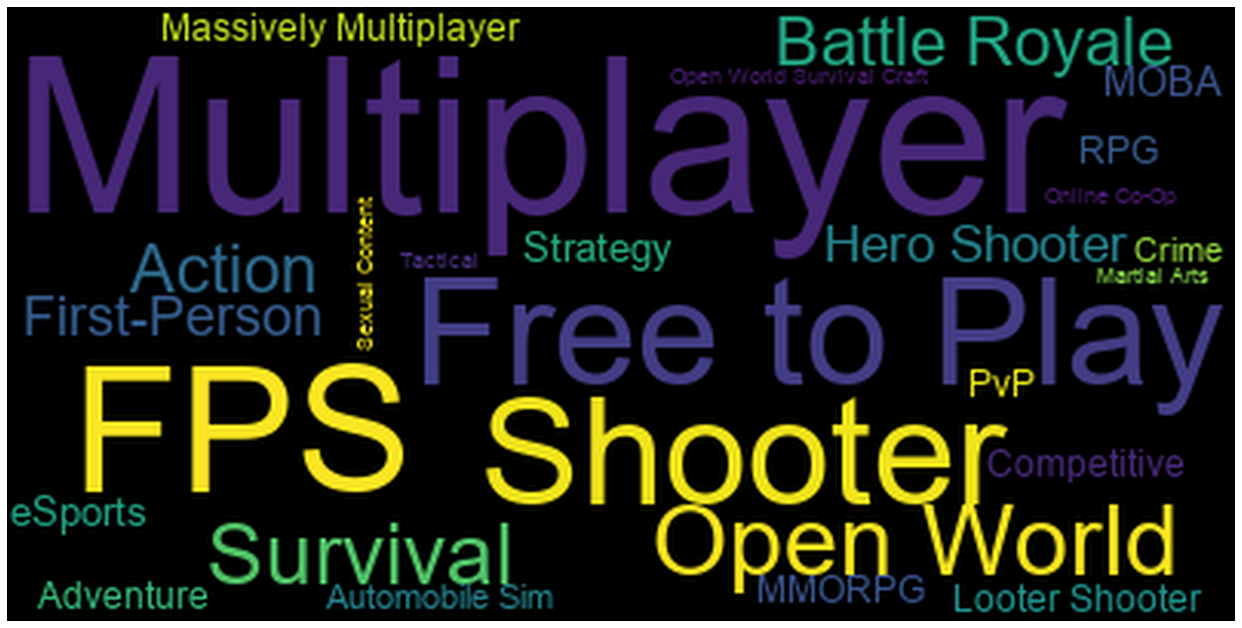

In [34]:
df.review_cnts = list(df_sorted_user.loc[df_sorted_user.review_count >= 500000].top_5_tags.values)
text_set = []
for i in range(len(wordset)):
    for j in range(5):
        text_set.append(wordset[i][j])
count = Counter(text_set)
text = dict(count.most_common())
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Arial.ttf', background_color='black').generate_from_frequencies(text)

plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

리뷰 수가 많은 게임들에 대해서도 비슷한 분포를 보인다. 즉, 스팀의 많은 이용자들은 멀티플레이어게임/FPS 게임을 하는 것일까?

### 변수들간의 관계 분석

리뷰 수와 플레이어 수에 관해 얼마나 관계가 있을지 보려고 한다.

In [35]:
df = df.drop('is_multi', axis = 1)

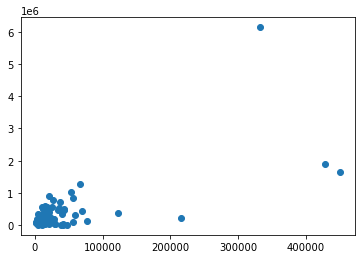

In [36]:
plt.scatter(df.Avg_Players, df.review_count)

In [37]:
df.corr()

,Avg_Players,review_level,review_count,tag_len
Avg_Players,1.000000,-0.368583,0.668140,NaN
review_level,-0.368583,1.000000,-0.038035,NaN
review_count,0.668140,-0.038035,1.000000,NaN
tag_len,NaN,NaN,NaN,NaN


상관관계를 살펴본 결과, 평균 플레이어 수가 많다고 해서, 리뷰 등급이 높은 것은 아닌 듯 하다.
플레이어수가 많을 수록, 리뷰 수는 확보되는 듯하다. 
즉 리뷰 레벨에 따른 게임 분석과 플레이어 수에 따른 게임 분석이 같이 이루어지면 유효할 것이다.

## 키워드로 할 수 있는 다른 일 - 게임 유사도 확인 / 키워드간 유사도 확인

다른 방법인 게임간의 키워드를 바탕으로 유사도를 계산하던가, 키워드간의 유사도를 확인할 수 있을 것이다.
이를 바탕으로, 인기가 많은 게임들에 공통으로 들어가있는 키워드를 분석하여 비슷한 테마의 게임을 제작할 수 있을 것이기에 키워드간 유사도 분석은 유의미할 수 있을 것이다.

In [38]:
df

,Game,Avg_Players,top_5_tags,review_level,review_count,tag_len
0,7 Days to Die,10518.917526,"[Survival, Zombies, Voxel, Open World, Open Wo...",4,201877,5
1,ARK: Survival Evolved,43003.742000,"[Open World Survival Craft, Survival, Open Wor...",4,494262,5
2,Age of Empires II: Definitive Edition,14780.262692,"[Strategy, RTS, City Builder, Multiplayer, Bas...",5,93763,5
3,Age of Empires IV,21188.755000,"[Strategy, RTS, Multiplayer, Medieval, Singlep...",4,27593,5
4,Apex Legends,122220.805714,"[Free to Play, Battle Royale, Multiplayer, Sho...",4,372061,5
...,...,...,...,...,...,...
84,World of Warships,5839.660392,"[Naval Combat, Free to Play, Massively Multipl...",4,94053,5
85,Yu-Gi-Oh! Duel Links,7754.211800,"[Free to Play, Card Game, Anime, Strategy, Mul...",4,35365,5
86,tModLoader,11515.083000,"[Adventure, Action, Indie, RPG, Free to Play]",5,102640,5
87,雀魂麻将(MahjongSoul),4166.096111,"[Psychological Horror, Souls-like, Free to Pla...",2,21854,5
